In [42]:
import numpy as np
import pandas as pd
import datetime

file = 'south.csv'

raw_data = pd.read_csv(file,header=0, delimiter=',')
data = np.array(raw_data)

df = pd.DataFrame(data, columns = ['usage', 'supply','temp','date'])
df['supply'] = df['supply'].apply(pd.to_numeric)
df['usage'] = df['usage'].apply(pd.to_numeric)
df['temp'] = df['temp'].apply(pd.to_numeric)
df['date'] = df['date'].apply(pd.to_datetime)

df.fillna(0)

print(df)
df.info()

      usage  supply  temp       date
0     918.3  1045.2  30.4 2016-10-01
1     889.3   989.5  32.3 2016-10-02
2    1038.7  1083.0  31.1 2016-10-03
3    1059.0  1095.8  30.3 2016-10-04
4    1079.4  1109.0  31.8 2016-10-05
5    1042.9  1146.8  30.8 2016-10-06
6     997.1  1069.6  31.5 2016-10-07
7     903.7   980.0  26.5 2016-10-08
8     869.6   872.8  25.9 2016-10-09
9     892.9   927.6  28.6 2016-10-10
10   1052.8  1059.9  31.6 2016-10-11
11   1048.7  1086.7  31.0 2016-10-12
12   1054.2  1083.1  30.4 2016-10-13
13   1061.8  1043.8  30.7 2016-10-14
14    993.7  1035.2  31.9 2016-10-15
15    951.6   878.5  31.2 2016-10-16
16   1086.8  1092.4  31.3 2016-10-17
17   1074.8  1140.2  31.2 2016-10-18
18   1077.8  1130.6  31.3 2016-10-19
19   1055.9  1138.5  30.7 2016-10-20
20   1085.0  1171.6  32.9 2016-10-21
21   1027.7  1061.6  31.5 2016-10-22
22    944.0   935.7  31.5 2016-10-23
23   1089.8  1106.4  32.1 2016-10-24
24   1072.9  1114.1  31.1 2016-10-25
25   1091.5  1124.5  32.0 2016-10-26
2

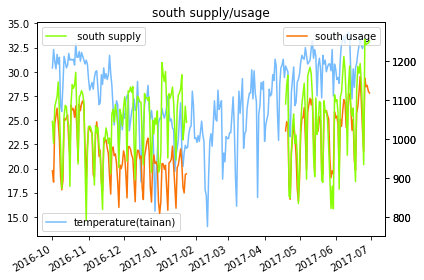

In [68]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()



#time = pd.to_datetime(df['date'])
ax1.plot(df['date'], df['temp'],label="temperature(tainan)",color='xkcd:sky blue')
#plt.setp(line_supply, linewidth=2, color='r') 

line_usage = ax1.twinx()
line_supply = ax1.twinx()

line_usage.plot(df['date'], df['usage'], label="south usage",color='xkcd:orange')
#plt.setp(line_supply, linewidth=2, color='b') 


line_supply.plot(df['date'], df['supply'],label=" south supply",color='xkcd:lime green')

#datemin = datetime.date(datetime.min().year, 1, 1)
#datemax = datetime.date(datetime.max().year + 1, 1, 1)
#ax1.set_xlim(datemin, datemax)

plt.xlabel('date')
plt.title('south supply/usage')
plt.setp(line_supply, yticks=[800, 900, 1000, 1100, 1200])
plt.setp(line_usage, yticks=[800, 900, 1000, 1100, 1200])
line_supply.set_ylim(750, 1300)
line_usage.set_ylim(750, 1300)
#line_supply.yticks([800, 900, 1000, 1100, 1200])
#line_usage.yticks([800, 900, 1000, 1100, 1200])

fig.autofmt_xdate()
ax1.legend()
line_usage.legend()
line_supply.legend()
plt.legend(loc="best")
fig.tight_layout()
plt.show()
fig.savefig('temp.png', dpi=fig.dpi)

In [25]:
file2 = 'max_south_usage.csv'
file3 = 'tainan_high_temp.csv'

raw_data2 = pd.read_csv(file2,header=0, delimiter=',')
raw_data3 = pd.read_csv(file3,header=0, delimiter=',')
data2 = np.array(raw_data2)
data3 = np.array(raw_data3)

df_usage = pd.DataFrame(data2, columns = ['max_usage', 'date'])
df_usage['max_usage'] = df_usage['max_usage'].apply(pd.to_numeric)
df_usage['date'] = df['date'].apply(pd.to_datetime)

df_temp = pd.DataFrame(data3, columns = ['max_temp', 'date'])
df_temp['max_temp'] = df_temp['max_temp'].apply(pd.to_numeric)
df_temp['date'] = df_temp['date'].apply(pd.to_datetime)

print(len(data3))
print(len(data2))

273
189


In [31]:
filled_value = df.fillna(0) # 有遺失值的觀測值填補 0  
print(filled_value)  

     max_supply       date
0        1045.2 2016-10-01
1         989.5 2016-10-02
2        1083.0 2016-10-03
3        1095.8 2016-10-04
4        1109.0 2016-10-05
5        1146.8 2016-10-06
6        1069.6 2016-10-07
7         980.0 2016-10-08
8         872.8 2016-10-09
9         927.6 2016-10-10
10       1059.9 2016-10-11
11       1086.7 2016-10-12
12       1083.1 2016-10-13
13       1043.8 2016-10-14
14       1035.2 2016-10-15
15        878.5 2016-10-16
16       1092.4 2016-10-17
17       1140.2 2016-10-18
18       1130.6 2016-10-19
19       1138.5 2016-10-20
20       1171.6 2016-10-21
21       1061.6 2016-10-22
22        935.7 2016-10-23
23       1106.4 2016-10-24
24       1114.1 2016-10-25
25       1124.5 2016-10-26
26       1115.9 2016-10-27
27       1094.9 2016-10-28
28        932.4 2016-10-29
29        792.4 2016-10-30
..          ...        ...
159      1096.2 2017-06-01
160      1101.2 2017-06-02
161      1067.9 2017-06-03
162       871.2 2017-06-04
163      1108.3 2017-06-05
1

In [28]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

df.plot(x='date', y='max_supply')
plt.tight_layout()



In [20]:
new_array = np.array(data, dtype=[("south_supply", float), ("date", datetime)])

SystemError: <built-in function getattr> returned a result with an error set

In [30]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#years = mdates.YearLocator()   # every year
#months = mdates.MonthLocator()  # every month
#yearsFmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()

#ax1.xaxis.set_major_locator(years)
#ax1.xaxis.set_major_formatter(yearsFmt)
#ax1.xaxis.set_minor_locator(months)



time = pd.to_datetime(data3[:, 1])
ax1.plot(time, df_temp['max_temp'], 'r')
#plt.setp(line_supply, linewidth=2, color='r') 

line_usage = ax1.twinx()
line_supply = ax1.twinx()

line_usage.plot(time, df_usage['max_usage'], 'b')
#plt.setp(line_supply, linewidth=2, color='b') 


line_supply.plot(time, df['max_supply'])

#datemin = datetime.date(datetime.min().year, 1, 1)
#datemax = datetime.date(datetime.max().year + 1, 1, 1)
#ax1.set_xlim(datemin, datemax)


fig.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (273,) and (189,)

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'south_supply': data[:,0], 'south_usage':data2[:,0], 'temp': data3[:,0]})

ax = df['south_supply'].plot()
ax2 = df['south_usage'].plot()
ax3 = df['tmep'].plot(secondary=True)

ValueError: arrays must all be same length